In [49]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer

In [50]:
# import data set
inputData = pd.read_csv("kidneyChronic.csv")
inputData.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [51]:
# remove any leading or trailing special characters such as \t \n etc.
for col in inputData.columns:
    inputData[col] = inputData[col].str.strip()
inputData.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [52]:
# Replace missing values with np.NaN for further processing of data frames
for input, data_set in inputData.iterrows():        
    for header in inputData:
        if data_set[header] == '?':
            data_set[header] = np.NaN

inputData.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [53]:
# for each attribute, calculate number of missing values
miss_vals = inputData.isnull().sum()
print(miss_vals)

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64


In [54]:
# Caclulate missing value percetnatge for each attribute
miss_vals_percentage = 100*inputData.isnull().sum()/len(inputData)
print(miss_vals_percentage)

age       2.25
bp        3.00
sg       11.75
al       11.50
su       12.25
rbc      38.00
pc       16.25
pcc       1.00
ba        1.00
bgr      11.00
bu        4.75
sc        4.25
sod      21.75
pot      22.00
hemo     13.00
pcv      17.75
wbcc     26.50
rbcc     32.75
htn       0.50
dm        0.50
cad       0.50
appet     0.25
pe        0.25
ane       0.25
class     0.00
dtype: float64


In [55]:
# Make a table with the results
miss_val_table = pd.concat([miss_vals, miss_vals_percentage], axis=1)

In [71]:
# set threshold for % of missing values 
miss_values_threshold = 100.0

# remove attributes whih have at least or more % of missing values than the threshold set
for input, data_set in miss_val_table.iterrows():
    if(miss_val_table.loc[input][1] > miss_values_threshold):
        print(input,miss_val_table.loc[input][1])
        del inputData[input]

inputData.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv_filled,wbcc_filled,rbcc_filled,htn_filled,dm_filled,cad_filled,pe_filled,ane_filled,appet_filled,class_filled
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,0.0,0.0,1,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,4.8,0.0,0.0,0.0,0.0,0.0,1,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,4.8,0.0,1.0,0.0,0.0,1.0,0,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,1.0,1.0,0,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,0.0,0.0,1,1


In [57]:
# Conver Nominal to intergers and Fill missing values
#concert age from string to float
inputData['age'] = inputData['age'].astype(np.float64)
inputData['age_filled'] = inputData['age'].fillna(np.nanmedian(inputData['age']))

#concert age from string to float
inputData['bp'] = inputData['bp'].astype(np.float64)
inputData['bp_filled'] = inputData['bp'].fillna(np.nanmedian(inputData['bp']))

inputData['sg'] = inputData['sg'].astype(np.float64)
inputData['sg_filled'] = inputData['sg'].fillna(np.nanmedian(inputData['sg']))

inputData['al'] = inputData['al'].astype(np.float64)
inputData['al_filled'] = inputData['al'].fillna(np.nanmedian(inputData['al']))

inputData['su'] = inputData['su'].astype(np.float64)
inputData['su_filled'] = inputData['su'].fillna(np.nanmedian(inputData['su']))

inputData[['rbc_filled','pc_filled']] = inputData[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})

inputData[['pcc_filled','ba_filled']] = inputData[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})

inputData['bgr'] = inputData['bgr'].astype(np.float64)
inputData['bgr_filled'] = inputData['bgr'].fillna(np.nanmedian(inputData['bgr']))

inputData['bu'] = inputData['bu'].astype(np.float64)
inputData['bu_filled'] = inputData['bu'].fillna(np.nanmedian(inputData['bu']))

inputData['sc'] = inputData['sc'].astype(np.float64)
inputData['sc_filled'] = inputData['sc'].fillna(np.nanmedian(inputData['sc']))

inputData['sod'] = inputData['sod'].astype(np.float64)
inputData['sod_filled'] = inputData['sod'].fillna(np.nanmedian(inputData['sod']))

inputData['pot'] = inputData['pot'].astype(np.float64)
inputData['pot_filled'] = inputData['pot'].fillna(np.nanmedian(inputData['pot']))

inputData['hemo'] = inputData['hemo'].astype(np.float64)
inputData['hemo_filled'] = inputData['hemo'].fillna(np.nanmedian(inputData['hemo']))

inputData['pcv'] = inputData['pcv'].astype(np.float64)
inputData['pcv_filled'] = inputData['pcv'].fillna(np.nanmedian(inputData['pcv']))

inputData['wbcc'] = inputData['wbcc'].astype(np.float64)
inputData['wbcc_filled'] = inputData['wbcc'].fillna(np.nanmedian(inputData['wbcc']))

inputData['rbcc'] = inputData['rbcc'].astype(np.float64)
inputData['rbcc_filled'] = inputData['rbcc'].fillna(np.nanmedian(inputData['rbcc']))

inputData[['htn_filled','dm_filled','cad_filled','pe_filled','ane_filled']] = inputData[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
inputData[['appet_filled']] = inputData[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
inputData['class_filled'] = inputData['class'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})


In [58]:
miss_vals = inputData.isnull().sum()
print(miss_vals[25:-1])

age_filled        0
bp_filled         0
sg_filled         0
al_filled         0
su_filled         0
rbc_filled      152
pc_filled        65
pcc_filled        4
ba_filled         4
bgr_filled        0
bu_filled         0
sc_filled         0
sod_filled        0
pot_filled        0
hemo_filled       0
pcv_filled        0
wbcc_filled       0
rbcc_filled       0
htn_filled        2
dm_filled         2
cad_filled        2
pe_filled         1
ane_filled        1
appet_filled      1
dtype: int64


In [86]:
#plt.plot(inputData["rbc_filled"])
#plt.show()
#print(inputData["rbc_filled"])
inputData["rbc_filled"] = inputData["rbc_filled"].fillna(-1)
inputData["pc_filled"] = inputData["pc_filled"].fillna(-1)

In [87]:
inputData["pcc_filled"]=inputData["pcc_filled"].fillna(-1)
inputData["ba_filled"] = inputData["ba_filled"].fillna(-1)

In [90]:
inputData["htn_filled"]=inputData["htn_filled"].fillna(-1)
inputData["dm_filled"]=inputData["dm_filled"].fillna(-1)
inputData["cad_filled"]=inputData["cad_filled"].fillna(-1)
inputData["pe_filled"]=inputData["pe_filled"].fillna(-1)
inputData["ane_filled"]=inputData["ane_filled"].fillna(-1)
inputData["appet_filled"]=inputData["appet_filled"].fillna(-1)

In [91]:
miss_vals = inputData.isnull().sum()
print(miss_vals[25:-1])

age_filled      0
bp_filled       0
sg_filled       0
al_filled       0
su_filled       0
rbc_filled      0
pc_filled       0
pcc_filled      0
ba_filled       0
bgr_filled      0
bu_filled       0
sc_filled       0
sod_filled      0
pot_filled      0
hemo_filled     0
pcv_filled      0
wbcc_filled     0
rbcc_filled     0
htn_filled      0
dm_filled       0
cad_filled      0
pe_filled       0
ane_filled      0
appet_filled    0
class_filled    0
dtype: int64


(array([ 6.,  4.,  6.,  5.,  9., 11., 13., 26., 16., 28., 46., 25., 45.,
        45., 37., 38., 21.,  7.,  2.,  1.]),
 array([ 2. ,  6.4, 10.8, 15.2, 19.6, 24. , 28.4, 32.8, 37.2, 41.6, 46. ,
        50.4, 54.8, 59.2, 63.6, 68. , 72.4, 76.8, 81.2, 85.6, 90. ]),
 <a list of 20 Patch objects>)

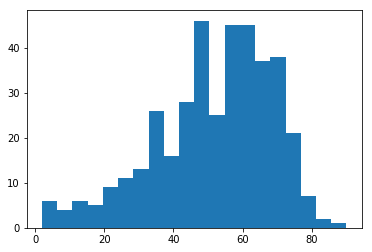

In [94]:
plt.hist(inputData["age"],bins=20)

In [ ]:
sns.boxplot(x="type", y="value", data=dataset, whis=3.0);